In [1]:
from numpy import *
from scipy.sparse import *
import matplotlib.pyplot as plt

In [2]:
tracks_all = load("tracks_with_eveything.npy")

In [3]:
durations = tracks_all[:,2].astype("int")

In [4]:
durations

array([224000, 157000, 217000, ...,     -1,     -1,     -1])

In [5]:
sorted_indexes = argsort(durations)

In [6]:
sorte = sort(durations)

In [7]:
durations

array([224000, 157000, 217000, ...,     -1,     -1,     -1])

In [8]:
sorte[99900:100000]

array([  1397000,   1398000,   1402000,   1410000,   1410000,   1410000,
         1411000,   1422000,   1434000,   1441000,   1457000,   1462000,
         1462000,   1473000,   1487000,   1497000,   1505000,   1505000,
         1513000,   1517000,   1525000,   1525000,   1532000,   1534000,
         1537000,   1539000,   1554000,   1558000,   1561000,   1570000,
         1573000,   1579000,   1579000,   1587000,   1589000,   1590000,
         1606000,   1613000,   1620000,   1623000,   1625000,   1636000,
         1646000,   1653000,   1707000,   1713000,   1721000,   1724000,
         1738000,   1740000,   1742000,   1756000,   1769000,   1777000,
         1790000,   1792000,   1794000,   1807000,   1810000,   1828000,
         1831000,   1834000,   1851000,   1875000,   1895000,   1934000,
         1935000,   1958000,   1992000,   2042000,   2051000,   2082000,
         2126000,   2134000,   2407000,   2477000,   2513000,   2539000,
         2569000,   2630000,   2657000,   2708000, 

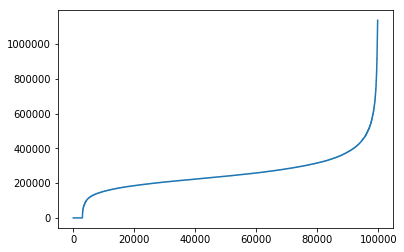

In [9]:
plt.plot(sorte[:99800])
plt.show()

In [10]:
tracks_brutte = array([id[0].astype("int") for id in tracks_all if id[2].astype("int")==-1])

In [11]:
tracks_brutte

array([2989724,  882374,  379301, ..., 2584455, 2299706, 2739985])

In [12]:
len(tracks_brutte)

2789

In [13]:
targetTrack=unique(genfromtxt("target_tracks.csv",dtype=int32,skip_header=1))
tracks_brutte_target = tracks_brutte[isin(tracks_brutte, targetTrack)]

In [14]:
len(tracks_brutte_target)

758

In [15]:
tracks_zero = array([id[0].astype("int") for id in tracks_all if id[2].astype("int")==0])

In [16]:
len(tracks_zero)

194

In [17]:
inv = array([1/d if d!=0 else 0 for d in durations ])

In [18]:
durationsTarget = tracks_all[isin(tracks_all[:,0], targetTrack),2].astype("int")

In [19]:
targetInv = array([1/d if d!=0 else 0 for d in durationsTarget ])

In [20]:
import sys
def progress(count, total, status=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)

    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', status))
    sys.stdout.flush() 

In [21]:
rows = []
cols = []
data = []
midval = 1/2
val = 1
stack = 11000
for i, el in enumerate(durations[stack:stack+1000]):
    if el <200000:
        eps = 1.8
        epsL = 1/eps
    if el > 200000 and el < 300000:
        eps = 1.5
        epsL = 1/eps
    elif el > 300000:
        eps = 1.2
        epsL = 1/eps
    for j, iv in enumerate(targetInv):
        if (el==-1 or el==0) and el==iv:
            rows.append(i)
            cols.append(j)
            data.append(midval)
        elif abs(el*iv) >epsL and abs(el*iv) <eps:
            rows.append(i)
            cols.append(j)
            data.append(val)
    progress(i, 1000, status="total")
    
        

In [22]:
Smatrix = coo_matrix((data, (rows, cols)), shape=(stack, 32195))

In [23]:
sli=1000
for s in range(12,20):
    stack = s*sli
    rows = []
    cols = []
    data = []
    for i, el in enumerate(durations[stack:stack+sli]):
        if el <200000:
            eps = 1.8
            epsL = 1/eps
        if el > 200000 and el < 300000:
            eps = 1.5
            epsL = 1/eps
        elif el > 300000:
            eps = 1.2
            epsL = 1/eps
        
        for j, iv in enumerate(targetInv):
            if (el==-1 or el==0) and el==iv:
                rows.append(i)
                cols.append(j)
                data.append(midval)
            elif abs(el*iv) >epsL and abs(el*iv) <eps:
                rows.append(i)
                cols.append(j)
                data.append(val)
    m = coo_matrix((data, (rows, cols)), shape=(sli, 32195))            
    Smatrix = vstack([Smatrix, m])
    progress(s-10, 20, status="total")
    

In [ ]:
save_npz("from10to20k.npz", Smatrix)

In [6]:
urm = load("playlists_with_tracks.npy")

In [32]:
d=0
c=0
b=0
ff=0
for t in urm[0,1:]:
    if t!=0:
        d += durations[where(tracks_all[:,0].astype("int32")==t)]
        c +=1
        if durations[where(tracks_all[:,0].astype("int32")==t)]==0:
            b+=1
        elif durations[where(tracks_all[:,0].astype("int32")==t)]==-1:
            ff+=1

print(c)
print(d[0]+ff)
print(b)
print(ff)

66
16262000
0
2


In [23]:
where(tracks_all[:,0].astype("int32")==t)

(array([], dtype=int64),)

In [29]:
urm[0]

array([10024884,  2879006,  1532328,  3027673,  3236144,  1563134,
         435345,   353291,   247331,   161455,  3338954,  2710242,
         661042,  1672852,  1197750,  2079443,  3669368,   634184,
        2864735,    98812,   395601,  2761193,  2479330,  1242583,
         187052,  1928272,  1531103,  2121777,   162673,  2773840,
        3481281,   195851,  2795693,  3471865,  3882913,  3577226,
        2044251,  2003473,  1904860,  1764559,  1032307,   634176,
         574908,  2187874,   450130,  1565351,   471263,   897319,
        2726115,   814732,  2830649,   285286,  2897887,  3421992,
          82829,   487955,  1925295,  3376598,   187564,  2830252,
        2391120,  3451601,  2515234,  1510434,  2543467,   458582,
        2214157,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,      